In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("cities_air_quality_water_pollution.18-10-2021 (1).csv")

In [8]:
df.shape

(3963, 5)

In [9]:
df.head()

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [10]:
df.tail()

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
3958,Yanbu,"""Medina Province""","""Saudi Arabia""",0.000000,50.000000
3959,Cordoba,"""Andalusia""","""Spain""",85.714286,8.333333
3960,Vic,"""Catalonia""","""Spain""",100.000000,0.000000
3961,Segovia,"""Castile and Leon""","""Spain""",100.000000,0.000000
3962,Zamora city,"""Castile and Leon""","""Spain""",100.000000,50.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               3963 non-null   object 
 1    "Region"          3963 non-null   object 
 2    "Country"         3963 non-null   object 
 3    "AirQuality"      3963 non-null   float64
 4    "WaterPollution"  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [12]:
df.describe()

,"""AirQuality""","""WaterPollution"""
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


In [13]:
df.columns = df.columns.str.strip().str.replace('"', '')

In [14]:
df['Country'].value_counts()

Country
 "United States of America"      842
 "People's Republic of China"    238
 "United Kingdom"                170
 "Canada"                        157
 "India"                         154
                                ... 
 "El Salvador"                     1
 "Suriname"                        1
 "Haiti"                           1
 "Togo"                            1
 "Lesotho"                         1
Name: count, Length: 177, dtype: int64

In [15]:
df['Region'].value_counts()

Region
 ""                       425
 "England"                142
 "California"             122
 "Texas"                   51
 "Florida"                 48
                         ... 
 "Durango"                  1
 "Elbasan County"           1
 "Bar Municipality"         1
 "Korce County"             1
 "Diyarbakir Province"      1
Name: count, Length: 1153, dtype: int64

In [16]:
df['Country'].value_counts().head()

Country
 "United States of America"      842
 "People's Republic of China"    238
 "United Kingdom"                170
 "Canada"                        157
 "India"                         154
Name: count, dtype: int64

In [17]:
df['Country'].value_counts().tail()

Country
 "El Salvador"    1
 "Suriname"       1
 "Haiti"          1
 "Togo"           1
 "Lesotho"        1
Name: count, dtype: int64

In [18]:
df['AirQuality'].max()

100.0

In [19]:
df['AirQuality'].min()

0.0

In [20]:
# Grouping the data by 'Region' and calculating the mean air quality for each region
region_air_quality = df.groupby('Region')['AirQuality'].mean()

# Finding the region with the maximum mean air quality
max_air_quality_region = region_air_quality.idxmax()
max_air_quality_value = region_air_quality.max()

(max_air_quality_region, max_air_quality_value)


(' "Ad Dakhiliyah Governorate"', 100.0)

In [21]:
df['WaterPollution'].min()

0.0

In [22]:
df['WaterPollution'].max()

100.0

In [23]:
# Grouping the data by 'Region' and calculating the mean air quality for each region
region_water_quality = df.groupby('Region')['WaterPollution'].mean()

# Finding the region with the maximum mean air quality
max_water_quality_region = region_water_quality.idxmax()
max_water_quality_value = region_water_quality.min()

(max_water_quality_region, max_water_quality_value )

(' "Ad Dakhiliyah Governorate"', 0.0)

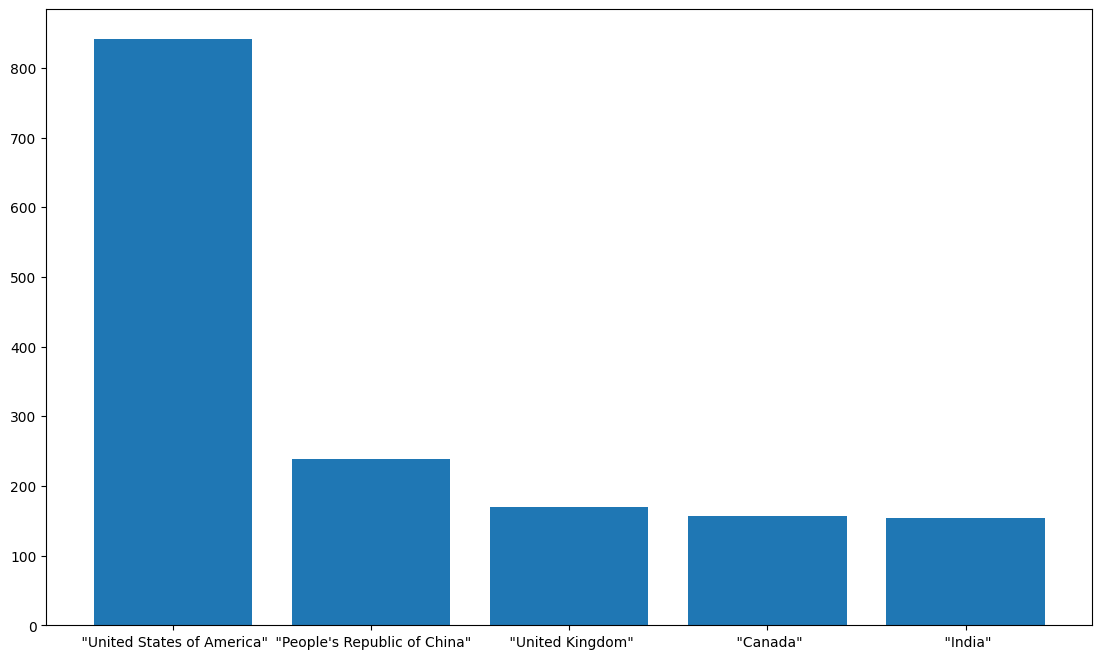

In [24]:
#making a bar-plot for the top 5 players with most man of the match awards
plt.figure(figsize=(13.5,8))
plt.bar(list(df['Country'].value_counts()[0:5].keys()),list(df['Country'].value_counts()[0:5]))
plt.show()

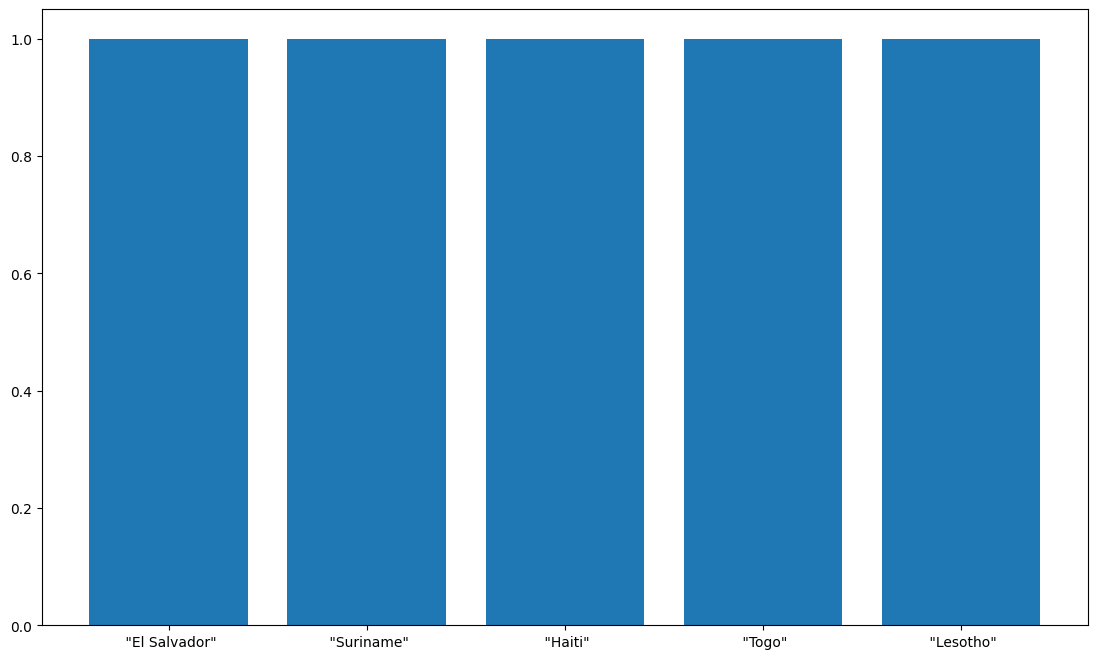

In [25]:
#making a bar-plot for the top 5 players with most man of the match awards
plt.figure(figsize=(13.5,8))
plt.bar(list(df['Country'].value_counts()[-5:].keys()),list(df['Country'].value_counts()[-5:]))
plt.show()

In [26]:
df.isnull().sum()

City              0
Region            0
Country           0
AirQuality        0
WaterPollution    0
dtype: int64

In [27]:
#lets check for duplicates in our dataset
df.duplicated().any()

False

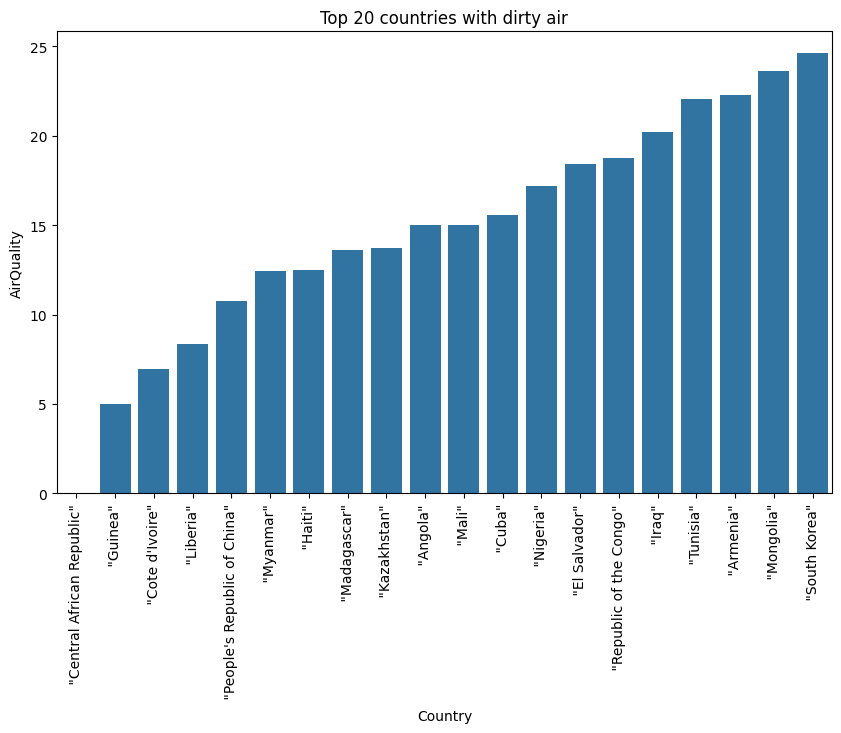

In [28]:
#lets visualize a bar chat for top 20 air polutants
bottom_20_air = df.groupby('Country')['AirQuality'].mean().sort_values(ascending=True).head(20)

#lets plot a barchart
#lets define figure size
plt.figure(figsize=(10,6))

#lets plot our graph using seaborn
sns.barplot(x=bottom_20_air.index, y=bottom_20_air )
plt.xticks(rotation=90)
plt.title("Top 20 countries with dirty air")
plt.show()

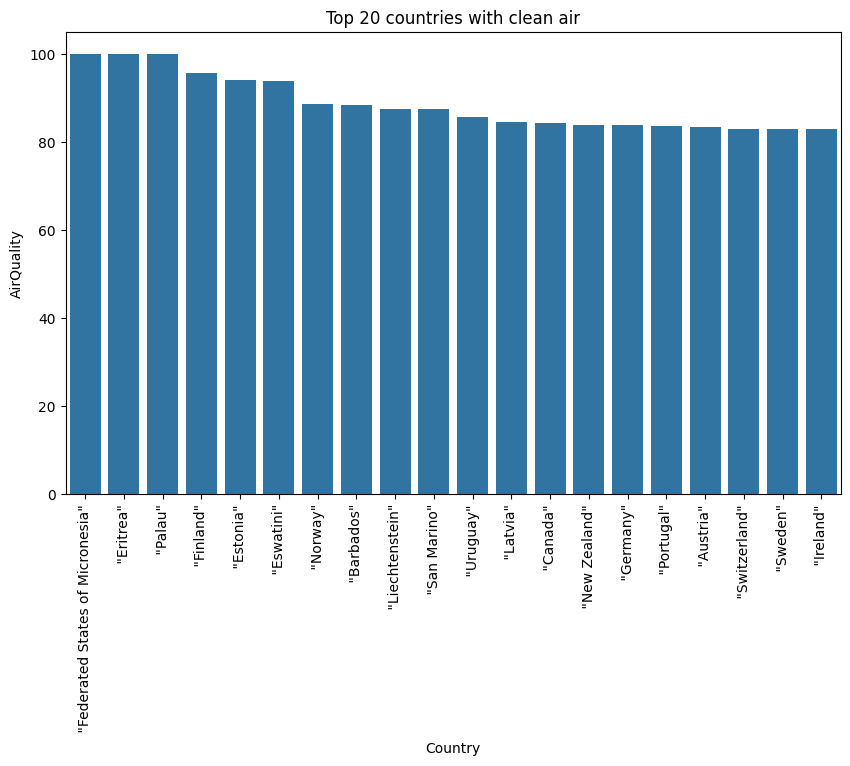

In [29]:
#lets visualize a bar chat for top 20 with clean air
top_20_air = df.groupby('Country')['AirQuality'].mean().sort_values(ascending=False).head(20)

#lets plot a barchart
#lets define figure size
plt.figure(figsize=(10,6))

#lets plot our graph using seaborn
sns.barplot(x=top_20_air.index, y=top_20_air)
plt.xticks(rotation=90)
plt.title("Top 20 countries with clean air")
plt.show()

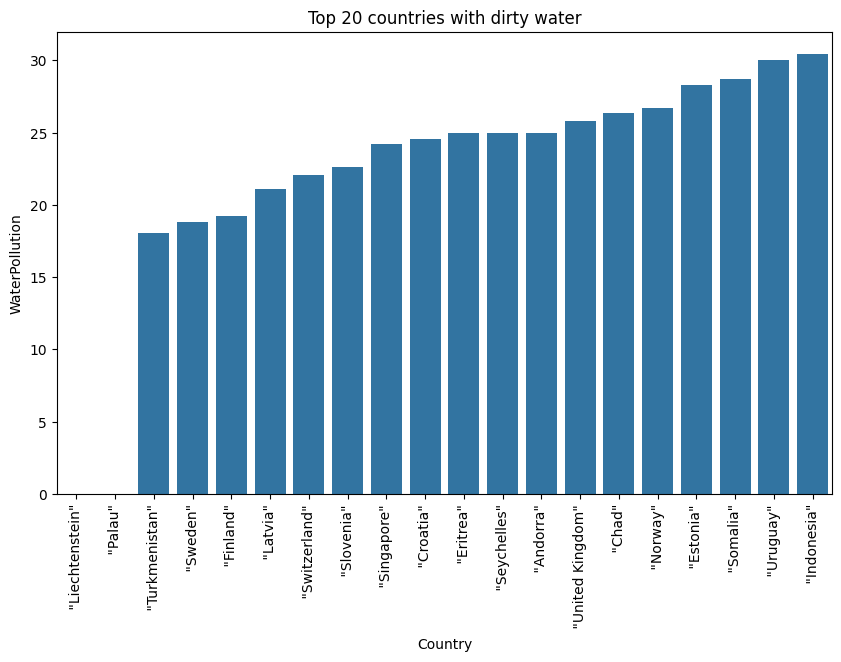

In [30]:
#lets plot a bar chart for water polutions
#lets visualize a bar chat for top 20 water polutants
bottom_20_water = df.groupby('Country')['WaterPollution'].mean().sort_values(ascending=True).head(20)

#lets plot a barchart
#lets define figure size
plt.figure(figsize=(10,6))

#lets plot our graph using seaborn
sns.barplot(x=bottom_20_water.index, y=bottom_20_water)
plt.xticks(rotation=90)
plt.title("Top 20 countries with dirty water")
plt.show()

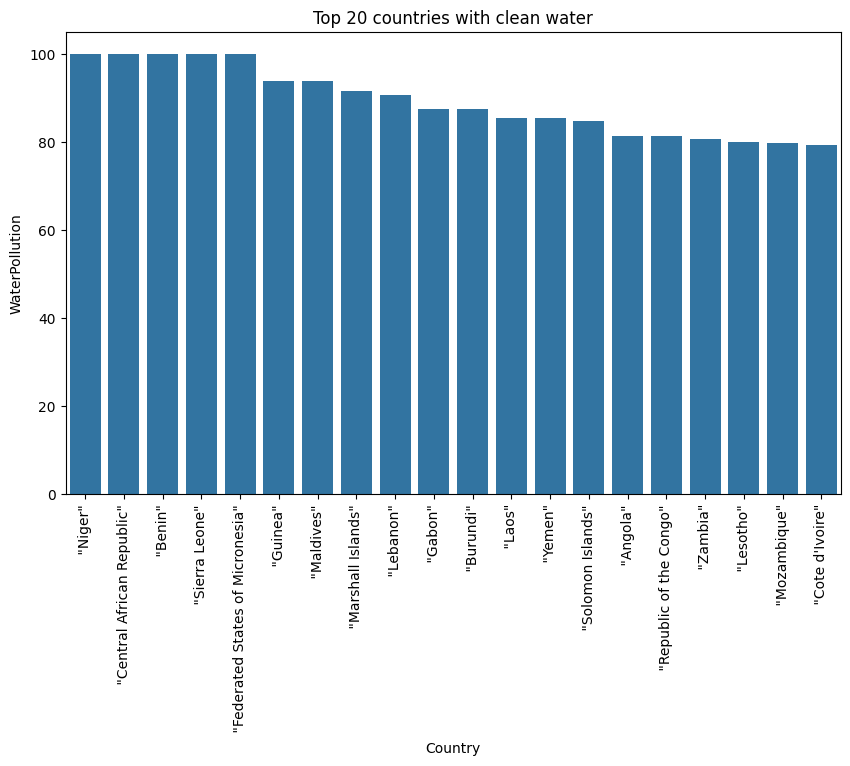

In [31]:
#lets visualize a bar chat for top 20 clean water
top_20_water = df.groupby('Country')['WaterPollution'].mean().sort_values(ascending=False).head(20)

#lets plot a barchart
#lets define figure size
plt.figure(figsize=(10,6))

#lets plot our graph using seaborn
sns.barplot(x=top_20_water.index, y=top_20_water)
plt.xticks(rotation=90)
plt.title("Top 20 countries with clean water")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


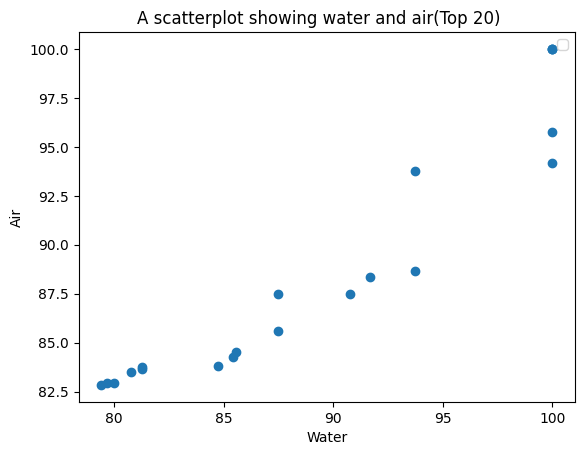

In [32]:
#lets plot a line graph to compare between air polution and water polution in different countries
plt.scatter(top_20_water,top_20_air)
plt.xlabel('Water')
plt.ylabel('Air')
plt.title('A scatterplot showing water and air(Top 20)   ')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


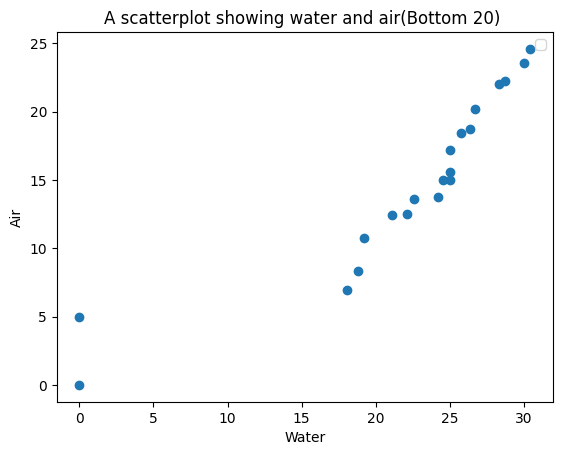

In [33]:
#lets compare the bottom 20
plt.scatter(bottom_20_water,bottom_20_air)
plt.xlabel('Water')
plt.ylabel('Air')
plt.title('A scatterplot showing water and air(Bottom 20) ')
plt.legend()
plt.show()

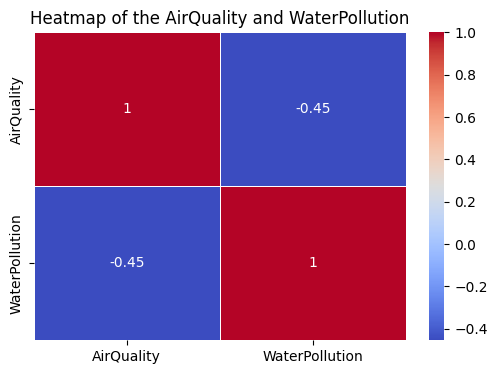

In [35]:
#lets plot a heatmap of water and air
water_air =['AirQuality','WaterPollution']
df1=df[water_air].corr()
# Plotting a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of the AirQuality and WaterPollution')
plt.show()